In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import torch
import random

In [3]:
purchase_df = pd.read_csv('kaggle/input/robi-datathon-30-qualifier-problem-1/purchase.csv')
boxes_df = pd.read_csv('kaggle/input/robi-datathon-30-qualifier-problem-1/boxes.csv')

In [4]:
purchase_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [5]:
base_date = datetime.date(2018, 10, 1)
purchase_df['day'] = purchase_df['PURCHASE_DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%d/%m/%Y').date() - base_date).days)

In [6]:
purchase_df.sample(10)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1684014,3/11/2018,2BCB9AF2375,131.0,1.0,33
1143554,2/12/2018,2C917B56587,143.0,1.0,62
785494,11/1/2019,2C6DCBA8B2A,162.0,1.0,102
1359018,16/12/2018,2CD14755FE3,174.0,1.0,76
1205692,6/12/2018,2973A2117A7,271.0,1.0,66
249028,13/2/2019,2C82CCAE1D8,144.0,1.0,135
2243227,17/10/2018,296D3EEF570,215.0,1.0,16
881997,17/1/2019,2BE47F56490,166.0,1.0,108
1024082,26/1/2019,2BCFB071AF5,106.0,1.0,117
1829718,21/11/2018,2C2383320AC,163.0,1.0,51


In [7]:
purchase_df.drop(['PURCHASE_DATE'], axis=1, inplace=True)

In [8]:
customer_keys = purchase_df['MAGIC_KEY'].unique()
customer_ids = {customer_keys[i]: i for i in range(len(customer_keys))}

In [9]:
purchase_df.drop(purchase_df[purchase_df['BOX_ID'].isnull()].index, inplace=True)
purchase_df.drop(purchase_df[purchase_df['BOX_COUNT'] < 0].index, inplace=True)

In [10]:
purchase_df['BOX_COUNT'] = purchase_df['BOX_COUNT'].astype(int)
purchase_df['BOX_ID'] = purchase_df['BOX_ID'].astype(int)

In [11]:
purchase_df.sample(10)

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1330640,2C2F6C76356,163,1,75
2234436,2CF2CB159AC,163,1,17
2184746,2C1EA748DE3,118,1,8
1877043,2CF2A7707C8,163,1,38
1430006,2CBC5113708,137,1,83
899021,2D36B19EEB7,89,1,109
2104763,2CAC853675B,163,1,11
2030564,2C81791DA1A,118,1,3
1518390,2C4D7FF2EF7,103,1,89
1656779,2CE1B9C659C,143,1,37


In [12]:
len(purchase_df['MAGIC_KEY'].unique())

1274087

In [13]:
len(purchase_df)

2455800

In [14]:
purchases = [[] for _ in range(len(customer_keys))]
purchase_df.apply(lambda x: purchases[customer_ids[x['MAGIC_KEY']]].append((x['BOX_ID'], x['BOX_COUNT'], x['day'])), axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2455859    None
2455860    None
2455861    None
2455862    None
2455863    None
Length: 2455800, dtype: object

In [15]:
purchase_df.head()

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
0,2CED678A247,12,1,123
1,2BF58D91BA1,12,1,123
2,2C15B86534E,99,1,123
3,2C32D9A859A,6,1,123
4,2C7A55404D1,4,1,123


In [16]:
prob1_df =pd.read_csv('kaggle/input/robi-datathon-30-qualifier-problem-1/problem 1.csv')
prob1_df.head()

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745


In [17]:
len(prob1_df)

58689

In [19]:
prob1_customers = [customer_ids[x] for x in prob1_df['MAGIC_KEY'].unique()]
len(prob1_customers)

58689

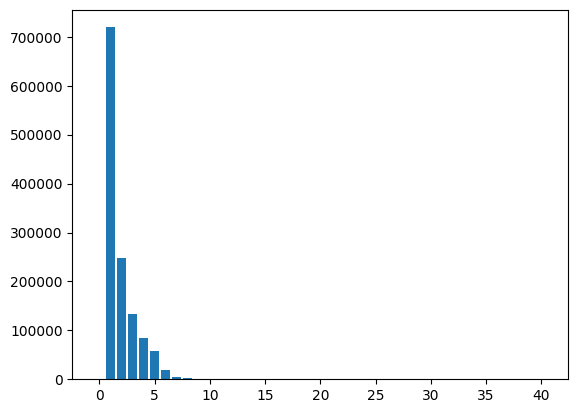

In [20]:
purchase_counts = {}
for i, _ in enumerate(purchases):
    cnt = len(purchases[i])
    if cnt not in purchase_counts:
        purchase_counts[cnt] = 1
    else:
        purchase_counts[cnt] += 1

#generate bar plot from purchase counts
        
import matplotlib.pyplot as plt
plt.bar(purchase_counts.keys(), purchase_counts.values())
plt.show()

In [21]:
purchases[0:10]

[[(12, 1, 123)],
 [(12, 1, 123)],
 [(99, 1, 123), (78, 1, 80)],
 [(6, 1, 123)],
 [(4, 1, 123)],
 [(238, 1, 123),
  (238, 1, 100),
  (238, 1, 80),
  (238, 1, 36),
  (238, 1, 56),
  (238, 1, 14)],
 [(227, 1, 123)],
 [(6, 1, 123)],
 [(204, 1, 123), (203, 1, 79), (203, 1, 49), (237, 1, 19)],
 [(231, 1, 123), (238, 1, 34), (233, 1, 6)]]

In [22]:
for i, _ in enumerate(purchases):
    purchases[i].sort(key=lambda x: x[2])

In [23]:
purchases[0:10]

[[(12, 1, 123)],
 [(12, 1, 123)],
 [(78, 1, 80), (99, 1, 123)],
 [(6, 1, 123)],
 [(4, 1, 123)],
 [(238, 1, 14),
  (238, 1, 36),
  (238, 1, 56),
  (238, 1, 80),
  (238, 1, 100),
  (238, 1, 123)],
 [(227, 1, 123)],
 [(6, 1, 123)],
 [(237, 1, 19), (203, 1, 49), (203, 1, 79), (204, 1, 123)],
 [(233, 1, 6), (238, 1, 34), (231, 1, 123)]]

In [24]:
a = 10
b = 10
print("single purchase: ")
for i, p in enumerate(purchases):
    if len(p) == 1:
        if a > 0:
            print(i, p)
            a -= 1

print("more than 5 purchase: ")
for i, p in enumerate(purchases):
    if len(p) > 5:
        if b > 0:
            print(i, p)
            b -= 1


single purchase: 
0 [(12, 1, 123)]
1 [(12, 1, 123)]
3 [(6, 1, 123)]
4 [(4, 1, 123)]
6 [(227, 1, 123)]
7 [(6, 1, 123)]
10 [(12, 1, 123)]
11 [(231, 1, 123)]
13 [(278, 1, 123)]
16 [(231, 1, 123)]
more than 5 purchase: 
5 [(238, 1, 14), (238, 1, 36), (238, 1, 56), (238, 1, 80), (238, 1, 100), (238, 1, 123)]
14 [(203, 1, 35), (203, 1, 53), (203, 1, 63), (221, 1, 72), (203, 1, 81), (203, 1, 87), (238, 1, 97), (204, 1, 123), (204, 1, 135), (272, 1, 150)]
38 [(8, 1, 15), (8, 1, 30), (8, 1, 60), (8, 1, 82), (8, 1, 104), (8, 1, 123)]
39 [(238, 1, 20), (238, 1, 44), (268, 1, 54), (238, 1, 67), (238, 1, 76), (238, 1, 89), (238, 1, 98), (238, 1, 105), (228, 1, 123), (238, 1, 129), (238, 1, 133), (238, 1, 138), (238, 1, 142), (230, 1, 147), (238, 1, 150)]
42 [(260, 1, 8), (203, 1, 23), (221, 1, 38), (221, 1, 65), (271, 1, 84), (272, 1, 104), (221, 1, 123), (276, 1, 145)]
43 [(137, 1, 6), (137, 1, 23), (137, 1, 42), (137, 1, 62), (137, 1, 79), (174, 1, 97), (174, 1, 123)]
44 [(238, 1, 18), (238, 1, 1

In [25]:
boxes_df[109:111]

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
109,110,Premium,Delivery from Collection Point,0.0,4.4,15.96
110,111,Premium,Delivery from Collection Point,0.0,4.7,15.96


In [26]:
len(boxes_df)

290

In [67]:
def meat_consumed(cid, start_day, end_day):
    boxes = filter(lambda x: x[2] >= start_day and x[2] < end_day, purchases[cid])
    meat_consumed = 0
    for id, cnt, _ in boxes:
        meat_consumed += cnt * boxes_df.at[id - 1, 'MEAT']
    return meat_consumed

def milk_consumed(cid, start_day, end_day):
    boxes = filter(lambda x: x[2] >= start_day and x[2] < end_day, purchases[cid])
    milk_consumed = 0
    for id, cnt, _ in boxes:
        milk_consumed += cnt * boxes_df.at[id - 1, 'MILK']
    return milk_consumed

def meat_consumption_rate(cid, end_day=151):
    if len(purchases[cid]) == 0:
        return 0.0
    start = purchases[cid][0][2]
    if end_day <= start:
        return 0
    try:
        return meat_consumed(cid, start, end_day) / (end_day - start)
    except:
        return 0

def milk_consumption_rate(cid, end_day=151):
    if len(purchases[cid]) == 0:
        return 0.0
    start = purchases[cid][0][2]
    if end_day <= start:
        return 0
    try:
        return milk_consumed(cid, start, end_day) / (end_day - start)
    except:
        return 0

In [68]:
last_day = purchase_df['day'].max()
last_day

150

In [69]:
last_date = datetime.date(2019, 2, 28)
(last_date - base_date).days

150

In [70]:
first_day = purchase_df['day'].min()
first_day

0

In [71]:
meat_consumption_rate(0)

0.05357142857142857

In [72]:
milk_consumption_rate(0)

0.2857142857142857

In [98]:
def last_meat_consumption(cid, end_day=150):
    consumptions = list(filter(lambda x: x[2] < end_day and boxes_df.at[x[0] - 1, 'MEAT'] > 0.0, purchases[cid]))
    try:
        bid, cnt, day = consumptions[-1]
    except:
        return None
    return [cnt * boxes_df.at[bid - 1, 'MEAT'], 
            end_day - day,
#             int(boxes_df.at[bid - 1, 'QUALITY'] == 'Standard'), 
#             int('CoD' not in str(boxes_df.at[bid - 1, 'DELIVERY_OPTION'])), 
#             float(boxes_df.at[bid - 1, 'UNIT_PRICE'])
           ]

def last_milk_consumption(cid, end_day=150):
    consumptions = list(filter(lambda x: x[2] < end_day and boxes_df.at[x[0] - 1, 'MILK'] > 0.0, purchases[cid]))
    try:
        bid, cnt, day = consumptions[-1]
    except:
        return None
    return [cnt * boxes_df.at[bid - 1, 'MILK'], 
            end_day - day,
#             int(boxes_df.at[bid - 1, 'QUALITY'] == 'Standard'), 
#             int('CoD' not in str(boxes_df.at[bid - 1, 'DELIVERY_OPTION'])), 
#             float(boxes_df.at[bid - 1, 'UNIT_PRICE'])
           ]

print(last_meat_consumption(3588, 150))
print(last_milk_consumption(3588, 150))

[4.4, 27]
None


In [93]:
# testing
idx = [i for i in range(len(purchases))]
no_meat = 0
no_milk = 0
both_no = 0

day = 151

for cid in idx:
    if len(purchases[cid]) < 2:
        continue
    last_meat = last_meat_consumption(cid, day)
    last_milk = last_milk_consumption(cid, day)
    if last_meat is None and last_milk is None:
        both_no += 1
    elif last_meat is None:
        no_meat += 1
    elif last_milk is None:
        no_milk += 1

print(no_meat, no_milk, both_no)

43814 131583 0


In [103]:
split = int(len(purchases) * 0.1)
idx = [i for i in range(len(purchases))]
random.shuffle(idx)
val_idx = idx[:split]
train_idx = idx[split:]

def generate_batch(day, batch_size, split='train'):
    batch = []
    labels = []
    n = 0
    current_idx = []
    
    if split == 'train':
        random.shuffle(train_idx)
        current_idx = train_idx
    else:
        random.shuffle(val_idx)
        current_idx = val_idx
        
    for cid in current_idx:
        if len(purchases[cid]) < 2:
            continue
        last_meat = last_meat_consumption(cid, day)
        last_milk = last_milk_consumption(cid, day)
            
        meat_rate = meat_consumption_rate(cid, day)
        milk_rate = milk_consumption_rate(cid, day)
        
        next_meat = meat_consumed(cid, day, day + 15)
        next_milk = milk_consumed(cid, day, day + 15)
        
        if last_meat is None and last_milk is None:
            continue
        
        if last_meat is None:
            last_meat = [0.0, day]
        elif last_milk is None:
            last_milk = [0.0, day]
            
        features = [meat_rate, milk_rate]
        features.extend(last_meat)
        features.extend(last_milk)
        
        batch.append(features)
        # [0, 1] -> purchase in next 15 days : class 1 
        # [1, 0] -> no purchase in next 15 days : class 0
        labels.append(1 if next_meat > 0.0 or next_milk > 0.0 else 0)
        
        n += 1
        if split=='train' and n == batch_size:
            return batch, labels
            
    if split == 'train':
        return None, None
    else:
        return batch, labels
batch, labels = generate_batch(100, 10)
print(batch)
print(labels)

[[0.06027397260273973, 0.2876712328767123, 2.2, 22, 11.0, 22], [0.09439252336448598, 0.16822429906542055, 3.6, 4, 18.0, 56], [0.04133333333333333, 0.22666666666666666, 2.2, 69, 8.0, 69], [0.042748091603053436, 0.22900763358778625, 1.8, 19, 10.0, 19], [0.06805555555555556, 0.5138888888888888, 2.2, 5, 16.0, 5], [0.017333333333333333, 0.10666666666666667, 1.3, 99, 8.0, 99], [0.05901639344262295, 0.45901639344262296, 1.8, 10, 12.0, 10], [0.04817518248175183, 0.22627737226277372, 2.2, 86, 11.0, 86], [0.027210884353741496, 0.1360544217687075, 2.2, 57, 11.0, 57], [0.06534653465346535, 0.31683168316831684, 2.2, 19, 11.0, 19]]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [104]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [105]:
import gc

class Predictor(torch.nn.Module):
    def __init__(self):
        super(Predictor, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(6, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 2),
        )
    def forward(self, x):
        # Output through the network
        x = self.mlp(x)
        return torch.softmax(x, dim=1)

model = Predictor()
model(torch.tensor(batch, dtype=torch.float32))

tensor([[0.5322, 0.4678],
        [0.5473, 0.4527],
        [0.5872, 0.4128],
        [0.5284, 0.4716],
        [0.5253, 0.4747],
        [0.6274, 0.3726],
        [0.5207, 0.4793],
        [0.6089, 0.3911],
        [0.5718, 0.4282],
        [0.5292, 0.4708]], grad_fn=<SoftmaxBackward0>)

In [106]:
# Clear the cache and collect garbage to free up memory
torch.cuda.empty_cache()
gc.collect()

# Generate and prepare validation data
val, val_labels = generate_batch(120, split, 'val')  # Update generate_batch as per your method signature
val = torch.tensor(val, dtype=torch.float32).to(device)
val_labels = torch.tensor(val_labels, dtype=torch.long).to(device)  # Ensure labels are long for CrossEntropyLoss
model.to(device)

Predictor(
  (mlp): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=2, bias=True)
  )
)

In [107]:
# Setup loss function, optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
best_accuracy = 0
batch_size = 256
epochs = 1000

for epoch in range(epochs + 1):
    batch, labels = generate_batch(random.randint(70, 136), batch_size)
    if batch is None:
        continue
    batch = torch.tensor(batch, dtype=torch.float32).to(device)
    labels = torch.tensor(labels, dtype=torch.long).to(device)
    
    optimizer.zero_grad()
    outputs = model(batch)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if epoch % 5 == 0:
        print(f'Epoch [{epoch}/{epochs}]: Training Loss: {loss.item():.4f}')
        
    if epoch % 10 == 0:
        # Validation pass
        with torch.no_grad():
            model.eval()  # Set model to evaluation mode
            val_outputs = model(val)
            val_loss = loss_fn(val_outputs, val_labels)
            
            # Calculate validation accuracy
            _, predicted = torch.max(val_outputs, 1)
            correct = (predicted == val_labels).sum().item()
            accuracy = correct / val_labels.size(0)
            
            print(f'Epoch [{epoch}/{epochs}]: Validation Loss: {val_loss.item():.4f}')
            print(f'Epoch [{epoch}/{epochs}]: Validation Accuracy: {accuracy * 100:.2f}%')
            
            # Save the model if validation loss has improved
            if accuracy > best_accuracy:
                torch.save(model.state_dict(), 'best_model.pth')
                best_accuracy = accuracy
                print(f"New best model saved with accuracy {best_accuracy:.4f}")
            
            model.train()  # Set model back to training mode
model.load_state_dict(torch.load('best_model.pth'))

Epoch [0/1000]: Training Loss: 0.6668
Epoch [0/1000]: Validation Loss: 0.6547
Epoch [0/1000]: Validation Accuracy: 66.80%
New best model saved with accuracy 0.6680
Epoch [5/1000]: Training Loss: 0.6651
Epoch [10/1000]: Training Loss: 0.6650
Epoch [10/1000]: Validation Loss: 0.6501
Epoch [10/1000]: Validation Accuracy: 66.80%
Epoch [15/1000]: Training Loss: 0.6113
Epoch [20/1000]: Training Loss: 0.6767
Epoch [20/1000]: Validation Loss: 0.6453
Epoch [20/1000]: Validation Accuracy: 66.80%
Epoch [25/1000]: Training Loss: 0.6336
Epoch [30/1000]: Training Loss: 0.6648
Epoch [30/1000]: Validation Loss: 0.6452
Epoch [30/1000]: Validation Accuracy: 66.80%
Epoch [35/1000]: Training Loss: 0.6297
Epoch [40/1000]: Training Loss: 0.5750
Epoch [40/1000]: Validation Loss: 0.6452
Epoch [40/1000]: Validation Accuracy: 66.80%
Epoch [45/1000]: Training Loss: 0.6023
Epoch [50/1000]: Training Loss: 0.6101
Epoch [50/1000]: Validation Loss: 0.6452
Epoch [50/1000]: Validation Accuracy: 66.80%
Epoch [55/1000]: 

<All keys matched successfully>

In [64]:
def predict(cid, day, model, device=None):
    # If device is not specified, use the model's device
    if device is None:
        device = next(model.parameters()).device

    meat_rate = meat_consumption_rate(cid, day)
    milk_rate = milk_consumption_rate(cid, day)
    last_meat = last_meat_consumption(cid, day)
    last_milk = last_milk_consumption(cid, day)
    
    if last_meat is None:
        last_meat = [0.0, day]
    elif last_milk is None:
        last_milk = [0.0, day]
    
    # Create the tensor and ensure it is on the correct device
    input_tensor = torch.tensor([meat_rate, milk_rate, 
                                 last_meat[0], last_meat[1], 
                                 last_milk[0], last_milk[1]], 
                                dtype=torch.float32).to(device)
    
    # Get the model prediction
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No gradients needed
        output = model(input_tensor.unsqueeze(0))  # Add batch dimension
        predicted_class = torch.argmax(output, dim=1)  # Get the index of the max logit
    
    return 'Y' if predicted_class.item() == 1 else 'N'

In [82]:
data = []
for cid in prob1_customers:
    data.append({
        'MAGIC_KEY': customer_keys[cid],
        'PURCHASE': predict(cid, 151, model, device=device)
    })
sub_df = pd.DataFrame(data, columns=['MAGIC_KEY', 'PURCHASE'])

In [83]:
sub_df.head()

,MAGIC_KEY,PURCHASE
0,28D5BB06356,N
1,293BEAB4E98,Y
2,2962EE8065C,N
3,2957BE29EA9,N
4,28E351A0745,N


In [63]:
sub_df.to_csv('submission.csv', index=False)